In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### 1. Import Cleaned Car Sell Dataset

In [3]:
#Read the car sell dataset and print its length.
car = pd.read_csv('/Users/nguyenphucnhuhai/Documents/GitHub/Portfolio 2/car_sells_clean_data.csv')

print("The number of rows and columns in car data set is:",car.shape)

The number of rows and columns in car data set is: (3657, 8)


### 2: Explore the Dataset

In [4]:
#Explore dataset
car.head() 
car.info()
car.dtypes
obj_car = car.select_dtypes(include=['object'].copy())
car.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
from sklearn.preprocessing import OrdinalEncoder
#Copy the car dataset into car_encoded, avoiding the lost information in original data
car_encoded = car.copy()

encoder = OrdinalEncoder()

car_encoded[['fuel','seller_type','transmission','owner']] = encoder.fit_transform(car_encoded[['fuel','seller_type','transmission','owner']])

car_encoded.info()

corr = car_encoded[['year','km_driven','seller_type','fuel','owner','selling_price']].corr()

#Correlation group by selling price and other features
sell_price_cor = corr['selling_price']
print(sell_price_cor)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   float64
 5   seller_type    3657 non-null   float64
 6   transmission   3657 non-null   float64
 7   owner          3657 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 228.7+ KB
year             0.411103
km_driven       -0.177203
seller_type     -0.208637
fuel            -0.277627
owner           -0.205524
selling_price    1.000000
Name: selling_price, dtype: float64


### Comment on correlation matrix
It is clear that the correlation between two categories is strong if they are close to -1 (negative correlated) or 1 (positive correlated). In contrast, the value close to 0 means no correlation at all.

In this case, all of the categories are negatively correlated to selling_price (except year). Year is the most correlated with selling price, with the value over 0.4, strongly indicating that the newer cars will likely have a higher price compared to the old ones. Year might be a significant predictor in a regression model, as it has a relatively strong positive correlation with selling price. 

With the negative correlation, it suggest that higher values for these features are associated with lower selling prices (the more kilometer driven, more owner own the car, the less price the car is).

Km_driven is the least contribution feature and the weak predictor in prediction model. The negative correlation highlights the more mileage, the less price in sell, but this correlation seems to be weaker than others.


### 3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [9]:
# Case 1: 10% for training and 90% for testing
train_case1, test_case1 = train_test_split(car_encoded,test_size = 0.9, random_state = 42)

# Case 2: 90% for training and 10% for testing
train_case2, test_case2 = train_test_split(car_encoded,test_size = 0.1, random_state = 42)

print(train_case1.shape)
print(test_case1.shape)
print(test_case2.shape)
print(train_case2.shape)

(365, 8)
(3292, 8)
(366, 8)
(3291, 8)


### 4: Train Linear Regression Models with Feature Selection under Cases 1 & 2

## Case 1: 10% training and 90% testing
### Model A (most correlated features: year and fuel), and Model B (least correlated features: km_driven and owner)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Model A
X_train1_most = train_case1[['year','fuel']]
X_test1_most = test_case1[['year','fuel']]
y_train1_most = train_case1[['selling_price']]
y_test1_most = test_case1[['selling_price']]

scaler = StandardScaler()
X_train1_most = scaler.fit_transform(X_train1_most)
X_test1_most = scaler.transform(X_test1_most)

model_a = LinearRegression()
model_a.fit(X_train1_most, y_train1_most)

y_predict1_most = model_a.predict(X_test1_most)

mse_a = mean_squared_error(y_test1_most, y_predict1_most)
msre_a = np.sqrt(mse_a)

print("The MSE in model A:",mse_a)
print("The MSRE in model A:",msre_a)

The MSE in model A: 240873725575.09464
The MSRE in model A: 490788.88085926994


In [14]:
#Model B
X_train1_least = train_case1[['km_driven','owner']]
X_test1_least = test_case1[['km_driven','owner']]
y_train1_least = train_case1[['selling_price']]
y_test1_least = test_case1[['selling_price']]

model_b = LinearRegression()
model_b.fit(X_train1_least, y_train1_least)

y_predict1_least = model_b.predict(X_test1_least)

mse_b = mean_squared_error(y_test1_least, y_predict1_least)
msre_b = np.sqrt(mse_b)

print("The MSE in model B:",mse_b)
print("The MSRE in model B:",msre_b)

The MSE in model B: 292715789614.6963
The MSRE in model B: 541032.152108076


## Case 2: 90% training and 10% testing
### Model C (most correlated features: year and fuel), and Model D (least correlated features: km_driven and owner)

In [15]:
# Model C
X_train2_most = train_case2[['year','fuel']]
X_test2_most = test_case2[['year','fuel']]
y_train2_most = train_case2[['selling_price']]
y_test2_most = test_case2[['selling_price']]

model_c = LinearRegression()
model_c.fit(X_train2_most, y_train2_most)

y_predict2_most = model_c.predict(X_test2_most)

mse_c = mean_squared_error( y_test2_most, y_predict2_most)
msre_c = np.sqrt(mse_c)

print("The MSE in model C:",mse_c)
print("The MSRE in model C:",msre_c)

The MSE in model C: 141350876932.57806
The MSRE in model C: 375966.59018133255


In [16]:
# Model D
X_train2_least = train_case2[['km_driven','owner']]
y_train2_least = train_case2[['selling_price']]
X_test2_least = test_case2[['km_driven','owner']]
y_test2_least = test_case2[['selling_price']]

model_d = LinearRegression()
model_d.fit(X_train2_least, y_train2_least)

y_predict2_least = model_b.predict(X_test2_least)

mse_d = mean_squared_error(y_test2_least, y_predict2_least)
msre_d = np.sqrt(mse_d)

print("The MSE in model D:",mse_d)
print("The MSRE in model D:",msre_d)

The MSE in model D: 202317888353.18442
The MSRE in model D: 449797.60821194283


### 5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

### MSE metric
- Model a: 240873725575.09464
- Model b: 292715789614.6963
- Model c: 141350876932.57806
- Model d: 202317888353.18442

### MSRE metric
- Model a: 490788.88085926994
- Model b: 541032.152108076
- Model c: 375966.59018133255
- Model d: 449797.60821194283

### Evaluation
- **Classify by case 1 and case 2:**
 
Overall, model a and model b (perform under case 1 method), with only 10% of the data used for training, the model may not have enough information to learn the underlying patterns effectively. As a result, the model are more variable from the actual values, and perform poorly on the test set, leading to a potentially higher MSE compared to model c and model d. These two models might not provide a reliable estimation because of lacking of sufficient data for training.

For case 2 method,with 90% of data used for training, which allow the model to access to a large amount of information to learn the important pattern. Therefore, the MSE will be lower than case 1 as the model is better fit on the training data and closer to the actual values, sugessting a better performance and high accuracy on capturing the underlying patterns in the data. However, only 10% on test data cannot effectively test the performance of the model, leading to the less reliable if the model has overfitted.

- **Classify by the most and least correlated features:**
  
With the most correlated features, MSE seems to be lower compared to the least correlated ones as the higher correlation features provide more meaningful predictions and contribute to improved model accuracy. In contrast, the model with least correlated features often show higher in error, indicating reduced predictive performance. As a result, MSE and MSRE tend to be higher as the errors differ greatly from the actual values. 


### 6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [17]:
# MSE and MSRE values for four models
model_dat = {
    'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    'MSE': [240873725575.09464, 292715789614.6963, 141350876932.57806, 202317888353.18442],
    'MSRE': [490788.88085926994, 541032.152108076, 375966.59018133255, 449797.60821194283]
}
model_dat = pd.DataFrame(model_dat)

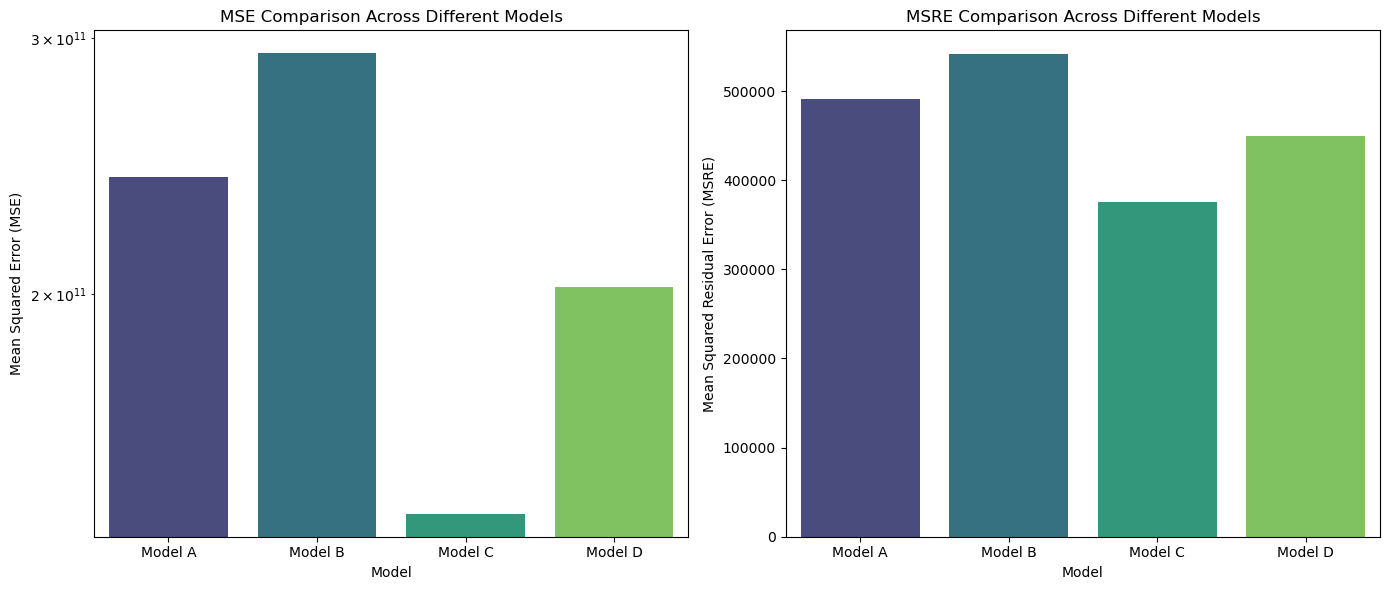

In [20]:
# Plot
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=model_dat, palette='viridis')
plt.title('MSE Comparison Across Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.yscale('log')  # Log scale for better visibility of large ranges

# Plot MSRE
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MSRE', data=model_dat, palette='viridis')
plt.title('MSRE Comparison Across Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Residual Error (MSRE)')
plt.tight_layout()
plt.show()

### Comment on the comparision between MSE and MSRE among 4 models.
More training data and highly correlated features in the model's training typically lead to better outcomes, such as fewer errors and predictions that are more accurate. This can be seen in Model C, which was tested using the most associated features, "year" and "fuel," and trained on 90% of the available data. As a result, Model C significantly outperformed the other models and produced an incredibly low MSE. This demonstrates how training with a sizable dataset and concentrating on the most underlying attributes can lead to better outcomes.

In terms of  MSRE, although model C reflect the incredible low resididual values, MSRE metric result is not aligned to the MSE outcomes. The reason potentially comes from the presence of significant larger discrepancies compared to the majority. As MSRE focus and highlights the residuals; Therefore, despite the high overall model performance, there are still some large errors in the model, leading the high MSRE in model C.

Among two metrics, model B performs the poorest, showing extreamly large MSE and MSRE. This low performance is caused by the use of poorly correlated features, which results in excessive residuals, and insufficient training data (only 10%), which restricts the model's capacity to learn important patterns.